In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('D:\\Machine learning\\data_sets\\tmd\\dataset_5secondWindow%5B3%5D.csv')
data.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,android.sensor.gyroscope#mean,...,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,0.000119,0.001651,...,0.002109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,0.000030,0.036326,...,0.000026,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,0.000004,0.001525,...,0.011312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,0.003451,0.036440,...,0.002788,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,0.064792,0.183202,...,0.025608,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,0.000000,Car


In [3]:
data.shape

(5893, 38)

In [4]:
data.describe()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,android.sensor.gyroscope#mean,...,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,...,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,117.731716,10.007976,8.426262,12.247691,0.982987,0.656334,0.643014,0.667008,0.010264,0.274351,...,0.683690,0.011369,65.445964,65.218848,65.672381,1.318661,4.919072,4.908018,4.929988,0.052997
std,126.474151,0.655949,1.783007,5.178436,1.505615,0.349446,0.348100,0.352741,0.025104,0.529583,...,0.354715,0.027480,32.136026,32.129213,32.180745,2.871450,10.023778,10.016863,10.031952,0.235927
min,3.000000,7.369055,0.337166,8.801019,0.001286,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.737143,7.805295,10.015566,0.078055,0.443915,0.414411,0.459807,0.000073,0.007377,...,0.411440,0.000125,58.402467,57.741088,58.879778,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,9.850143,9.123124,10.602081,0.369163,0.779667,0.750004,0.803979,0.001083,0.035267,...,0.848566,0.002157,79.475484,79.086780,79.862550,0.037179,0.000000,0.000000,0.000000,0.000000
75%,152.000000,10.078998,9.691731,12.291575,1.058376,0.956667,0.951903,0.962301,0.007644,0.205268,...,0.975144,0.009687,89.722940,89.720104,89.726909,1.487859,5.250000,5.179912,5.355687,0.000000
max,682.000000,17.427391,12.115013,66.886376,12.879851,1.000000,1.000000,1.000000,0.324466,5.662153,...,1.000000,0.439629,90.308734,90.308734,90.308734,26.835546,51.360060,51.360060,51.360060,3.842801


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000157DBD88CC0>,
      dtype=object)

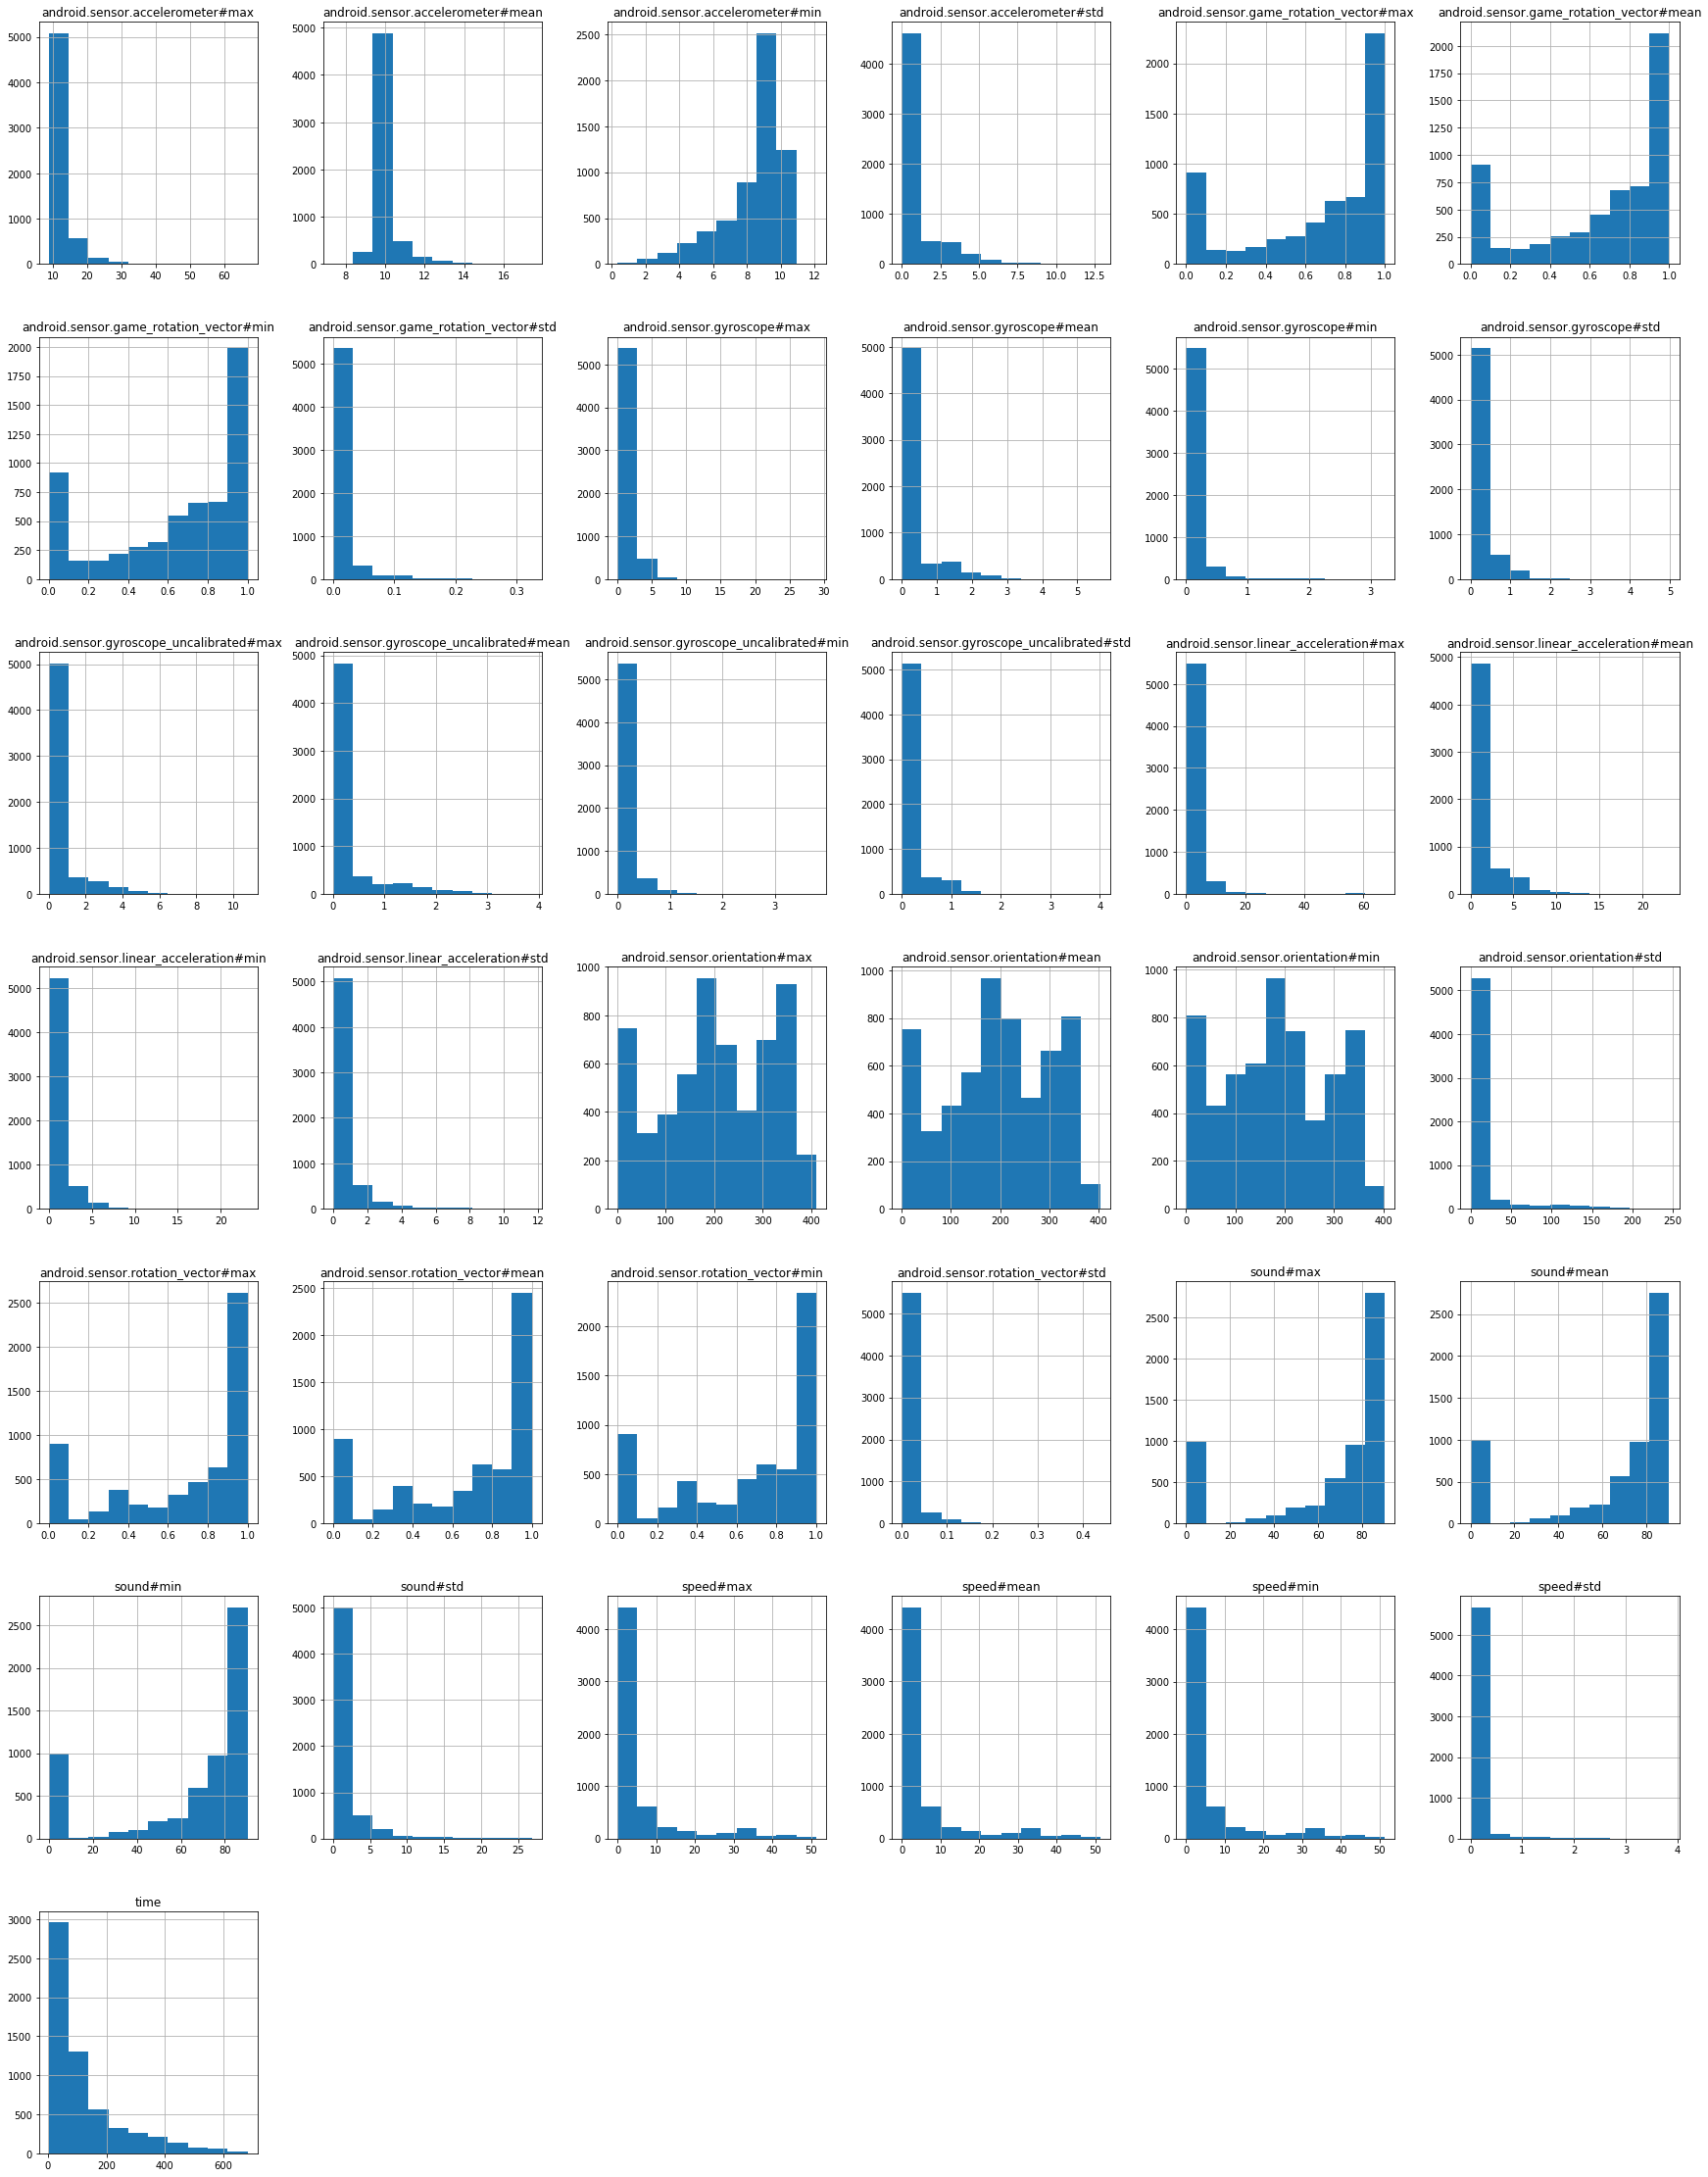

In [5]:
fig = plt.figure(figsize = (30,40))
ax = fig.gca()
data.hist(ax = ax)

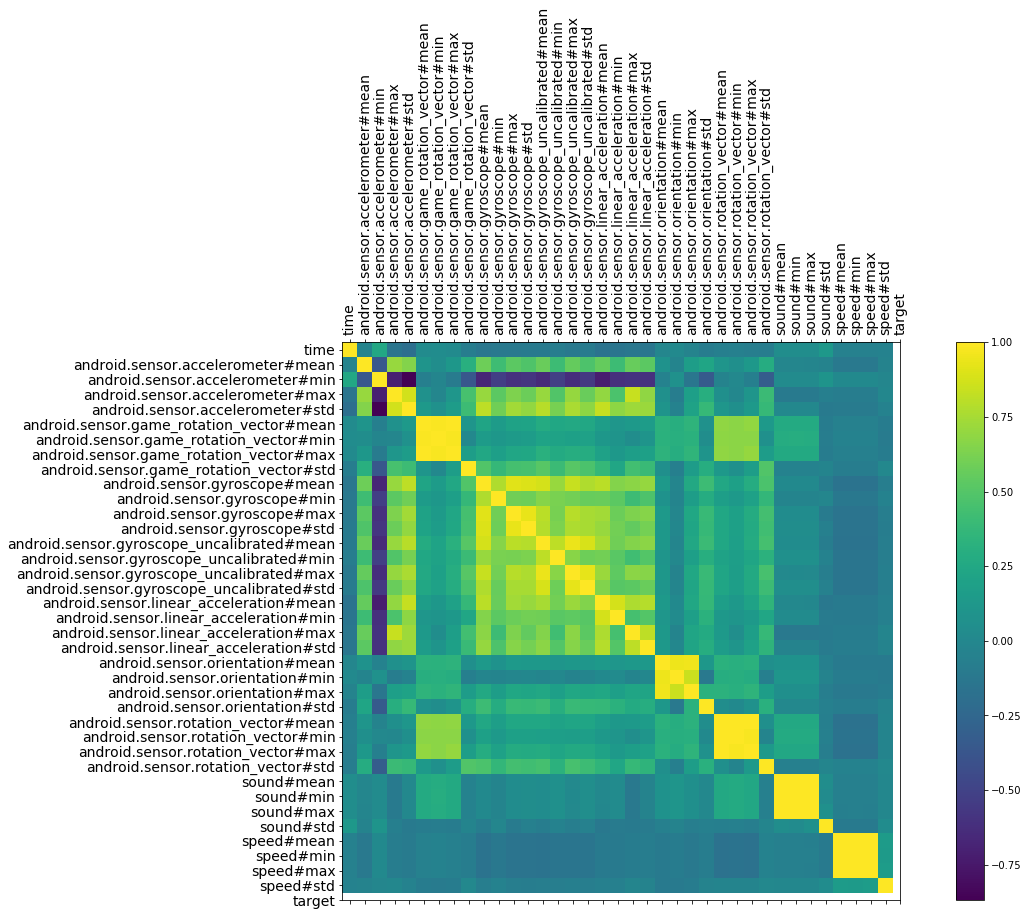

In [6]:
plt.figure(figsize=(20,10))
plt.matshow(data.corr(), fignum=1)
plt.yticks(np.arange(data.shape[1]), data.columns, fontsize=14)
plt.xticks(np.arange(data.shape[1]), data.columns, rotation='vertical', fontsize=14)
plt.colorbar() 

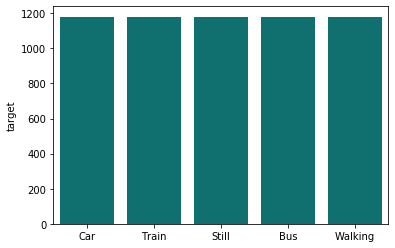

In [7]:
sns.barplot(x=data.target.value_counts().index,y=data.target.value_counts(),
            color='teal')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   time                                        5893 non-null   float64
 1   android.sensor.accelerometer#mean           5893 non-null   float64
 2   android.sensor.accelerometer#min            5893 non-null   float64
 3   android.sensor.accelerometer#max            5893 non-null   float64
 4   android.sensor.accelerometer#std            5893 non-null   float64
 5   android.sensor.game_rotation_vector#mean    5893 non-null   float64
 6   android.sensor.game_rotation_vector#min     5893 non-null   float64
 7   android.sensor.game_rotation_vector#max     5893 non-null   float64
 8   android.sensor.game_rotation_vector#std     5893 non-null   float64
 9   android.sensor.gyroscope#mean               5893 non-null   float64
 10  android.sens

In [9]:
data.isnull().values.any()

False

In [10]:
t = {'Bike' : 0, 'Bus' : 1, 'Car' : 2, 'Still' : 3, 'Train' : 4, 'Walking' : 5}
data.target = [t[x] for x in data.target]

In [11]:
X=data.drop(columns=['target'])
y=data['target']

In [12]:
y

0       3
1       2
2       3
3       2
4       2
       ..
5888    5
5889    4
5890    3
5891    3
5892    5
Name: target, Length: 5893, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [15]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
f1_score(y_test, y_pred, average='macro')

Accuracy score 0.9457167090754877


0.9457938995676243

In [16]:
#lightGBM
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label = y_train)
params = {}
clf = lgb.train(params, d_train, 100)
y_pred = clf.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred.round())))
print(f1_score(y_test, y_pred.round(), average='macro'))

Accuracy score 0.8515691263782866
0.8552228670049061


In [17]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators = 200,learning_rate = 0.3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
f1_score(y_test, y_pred, average='macro')

Accuracy score 0.9635284139100933


0.9633717727153467

In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
f1_score(y_test, y_pred, average='macro')

Accuracy score 0.8210347752332485


0.8173953133420433

In [19]:
#Naivye Bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
f1_score(y_test, y_pred, average='macro')

Accuracy score 0.5869380831212893


0.5633882421642216

In [20]:
#SVC
from sklearn.svm import SVC
clf=SVC(kernel='linear',gamma='scale')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
f1_score(y_test, y_pred, average='macro')

Accuracy score 0.7455470737913485


0.7479306032387177

Best: -0.128052 using {'learning_rate': 0.1, 'n_estimators': 400}
-1.592213 (0.000313) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-1.575290 (0.000567) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-1.558719 (0.000802) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-1.542484 (0.001010) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-1.526628 (0.001188) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-1.451871 (0.001854) with: {'learning_rate': 0.001, 'n_estimators': 100}
-1.322082 (0.003435) with: {'learning_rate': 0.001, 'n_estimators': 200}
-1.212747 (0.005752) with: {'learning_rate': 0.001, 'n_estimators': 300}
-1.119186 (0.007216) with: {'learning_rate': 0.001, 'n_estimators': 400}
-1.036842 (0.007600) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.740166 (0.007953) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.451543 (0.012514) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.320373 (0.016815) with: {'learning_rate': 0.01, 'n_e

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


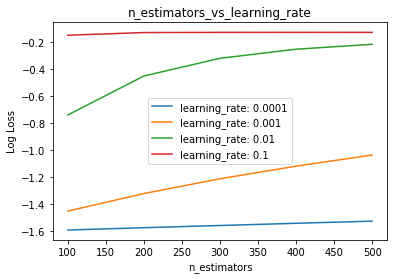

In [21]:
#xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.title('n_estimators_vs_learning_rate')
plt.show()

In [22]:
xg = XGBClassifier(n_estimators = 400,learning_rate = 0.1)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
f1_score(y_test, y_pred, average='macro')

Accuracy score 0.9737065309584394


0.9736826987985505